## Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading Data

In [3]:
df = pd.read_csv('cardio.csv',delimiter=';')

In [4]:
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


# EDA
## Shape of the Data

In [5]:
df.shape

(70000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Empty Values

In [7]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.isnull().values.any()

False

## View Basic Statistics

In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Comparison of the number of patients with a heart diseases and without a heart disease.

In [10]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

## Visualization

c:\users\touhi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

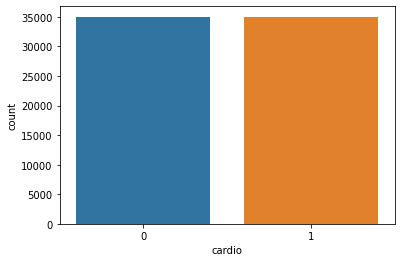

In [11]:
sns.countplot(df['cardio'])

c:\users\touhi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

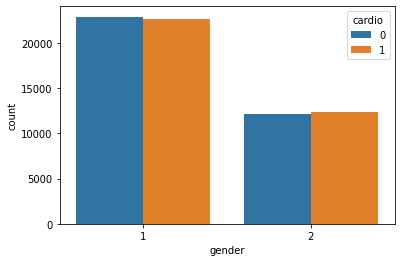

In [12]:
sns.countplot(df['gender'],data=df,hue='cardio')

cardio      0      1
gender              
1       22914  22616
2       12107  12363


<AxesSubplot:xlabel='gender'>

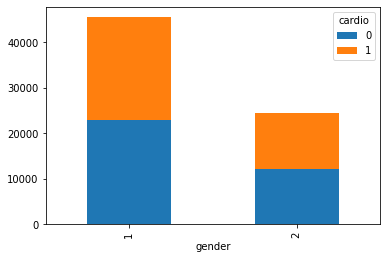

In [13]:
stack = pd.crosstab(df['gender'],df['cardio'])
print(stack)
stack.plot(kind='bar',stacked=True)

cholesterol      1     2     3
cardio                        
0            29330  3799  1892
1            23055  5750  6174


<AxesSubplot:xlabel='cardio'>

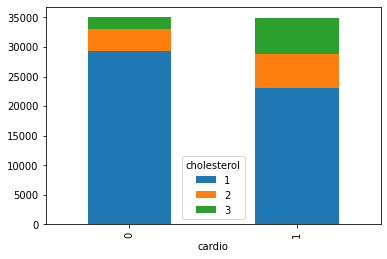

In [14]:
stack = pd.crosstab(df['cardio'],df['cholesterol'])
print(stack)
stack.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

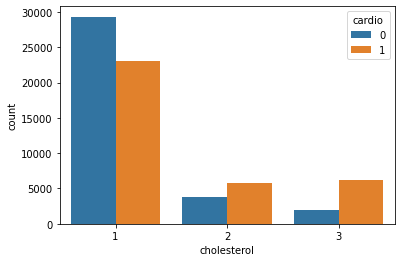

In [15]:
sns.countplot(x='cholesterol',data=df,hue='cardio')

<AxesSubplot:xlabel='smoke', ylabel='count'>

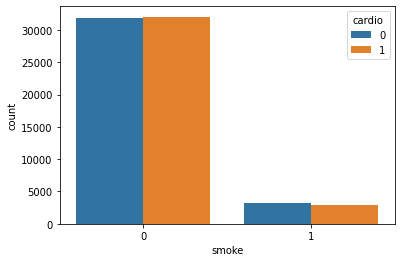

In [16]:
sns.countplot(x='smoke',data=df,hue='cardio')

<AxesSubplot:xlabel='alco', ylabel='count'>

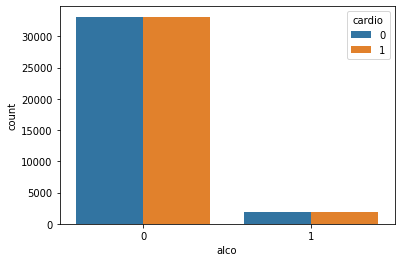

In [17]:
sns.countplot(x='alco',data=df,hue='cardio')

<AxesSubplot:xlabel='gluc', ylabel='count'>

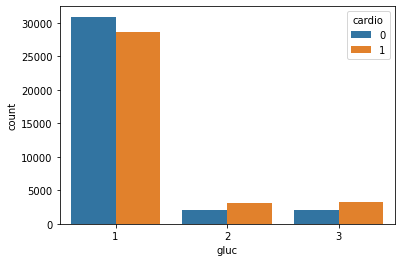

In [18]:
sns.countplot(x='gluc',data=df,hue='cardio')

## Heart diseases based on age

In [19]:
# Create a years column
df['years'] = (df['age']/365).round(0)
df['years'] = pd.to_numeric(df['years'],downcast='integer')

In [20]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


<AxesSubplot:xlabel='years', ylabel='count'>

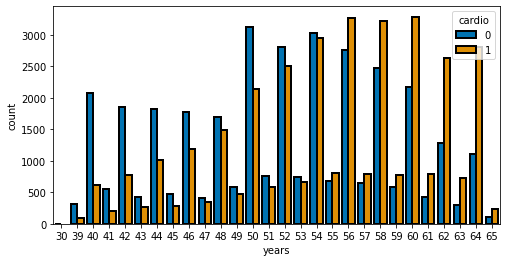

In [21]:
# Visualizing the data
plt.figure(figsize=(8,4))
sns.countplot(x='years',hue='cardio',data=df, palette='colorblind',saturation=1,edgecolor=(0,0,0),linewidth=2)

<AxesSubplot:xlabel='gender', ylabel='weight'>

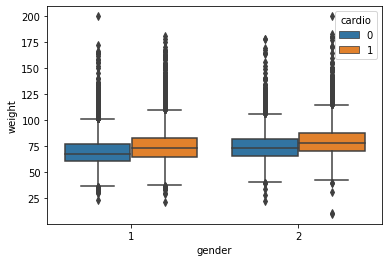

In [22]:
sns.boxplot(data=df, x='gender',y='weight',hue='cardio')

<Figure size 1440x1440 with 0 Axes>

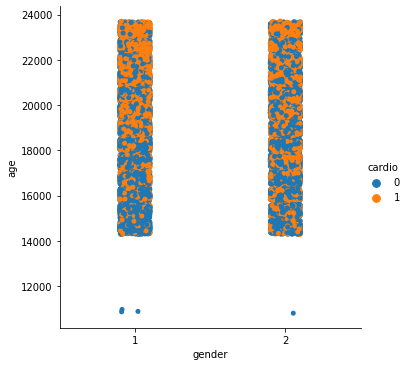

In [23]:
plt.figure(figsize=(20,20))
sns.catplot(data=df,x='gender',y='age',hue='cardio')

<AxesSubplot:xlabel='gender', ylabel='cholesterol'>

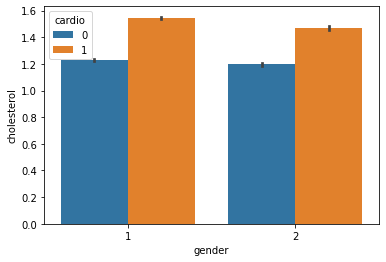

In [24]:
sns.barplot(data=df,x='gender',y='cholesterol',hue='cardio')

<AxesSubplot:xlabel='weight', ylabel='count'>

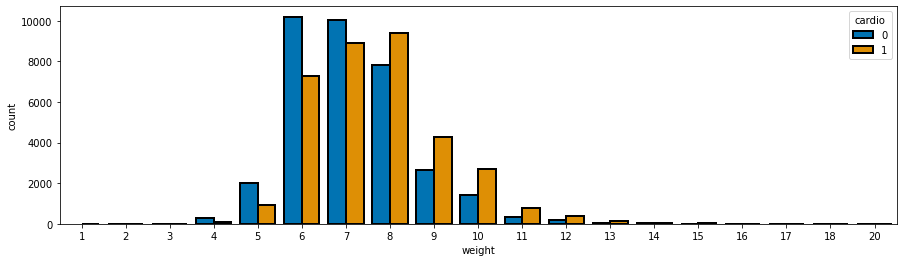

In [25]:
df['weight'] = (df['weight']/10).round(0)
df['weight'] = pd.to_numeric(df['weight'],downcast='integer')
plt.figure(figsize=(15,4))
sns.countplot(x='weight',hue='cardio',data=df, palette='colorblind',saturation=1,edgecolor=(0,0,0),linewidth=2)

<AxesSubplot:>

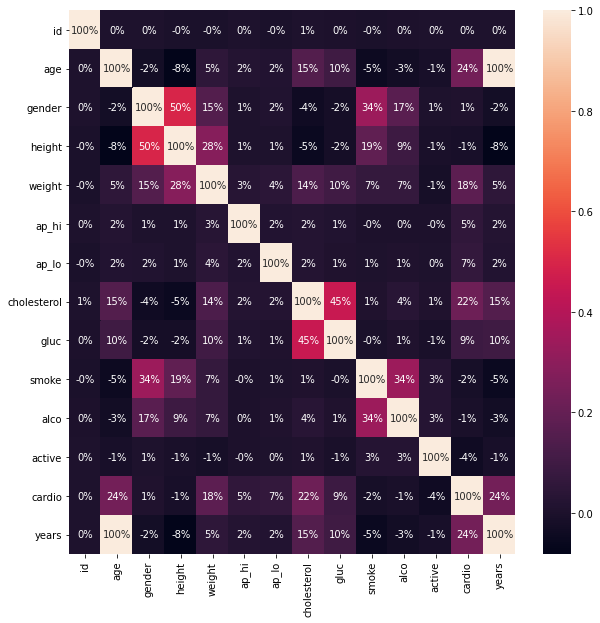

In [26]:
# Get the correlations of the column
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [27]:
#Drop the years column
df = df.drop('years',axis=1)

In [28]:
df = df.drop('id',axis=1)
df.head(4)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,6,110,80,1,1,0,0,1,0
1,20228,1,156,8,140,90,3,1,0,0,1,1
2,18857,1,165,6,130,70,3,1,0,0,0,1
3,17623,2,169,8,150,100,1,1,0,0,1,1


In [29]:
#sns.pairplot(data=df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>]], dtype=object)

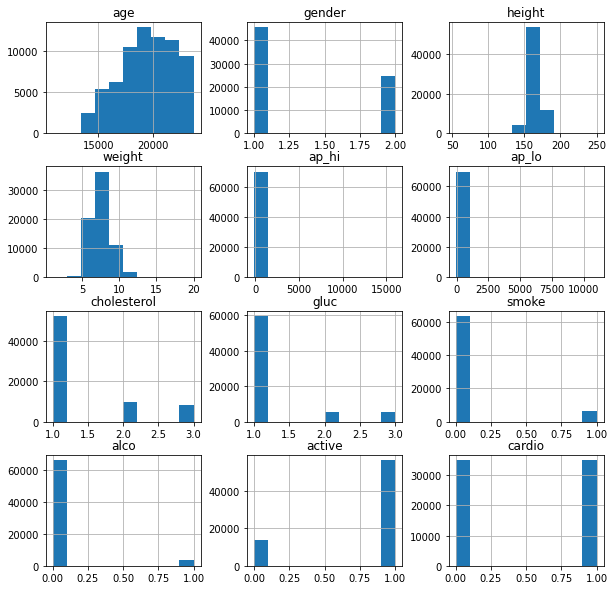

In [30]:
df.hist(figsize=(10,10))

age               AxesSubplot(0.125,0.749828;0.227941x0.130172)
gender         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
height         AxesSubplot(0.672059,0.749828;0.227941x0.130172)
weight            AxesSubplot(0.125,0.593621;0.227941x0.130172)
ap_hi          AxesSubplot(0.398529,0.593621;0.227941x0.130172)
ap_lo          AxesSubplot(0.672059,0.593621;0.227941x0.130172)
cholesterol       AxesSubplot(0.125,0.437414;0.227941x0.130172)
gluc           AxesSubplot(0.398529,0.437414;0.227941x0.130172)
smoke          AxesSubplot(0.672059,0.437414;0.227941x0.130172)
alco              AxesSubplot(0.125,0.281207;0.227941x0.130172)
active         AxesSubplot(0.398529,0.281207;0.227941x0.130172)
cardio         AxesSubplot(0.672059,0.281207;0.227941x0.130172)
dtype: object

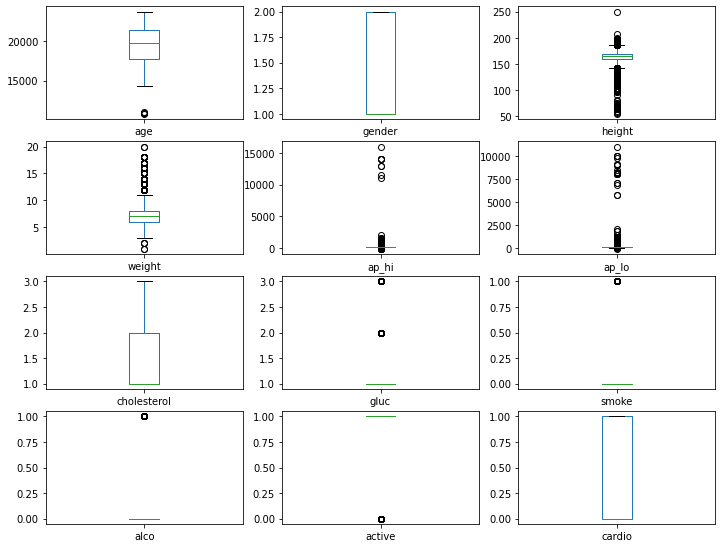

In [31]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))

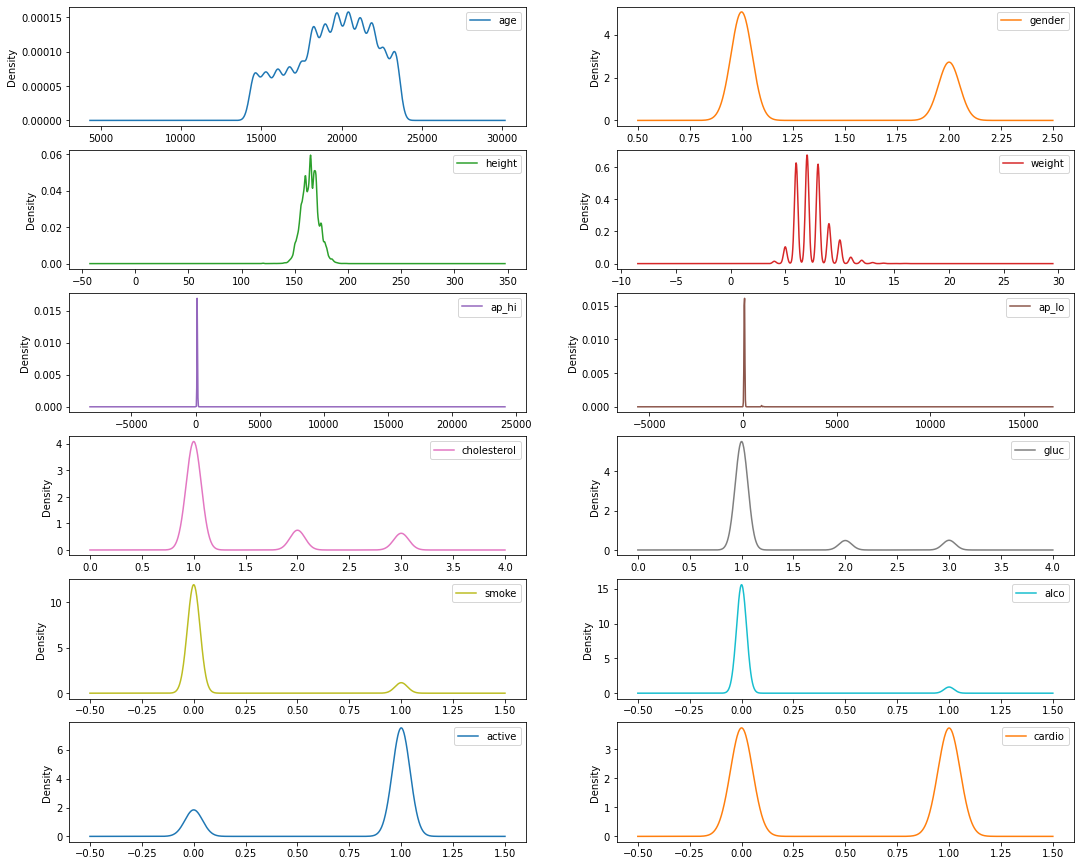

In [32]:
df.plot(kind='density', subplots=True, layout=(7,2), sharex=False , figsize =(18,18))
plt.show()

In [33]:
num_var = ['age','ap_hi', 'cholesterol', 'weight', 'gluc', 'cardio' ]
#sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

In [34]:
#Split the data into feature data and target data

In [35]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [36]:
#Split the data into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=1)

In [37]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [39]:
#Test model acuracy on training dataset
model = forest
model.score(X_train, Y_train)

0.977352380952381

In [40]:
# Test the model accuracy on test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model.predict(X_test)) 
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

#print the confusion matrix
print(cm)
#print the model accuracy on the test data
print('Model Test Accuracy=',(TP+TN)/(TP+TN+FN+FP))

[[6346 2263]
 [3048 5843]]
Model Test Accuracy= 0.6965142857142858


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,25):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,X,Y,cv=5)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

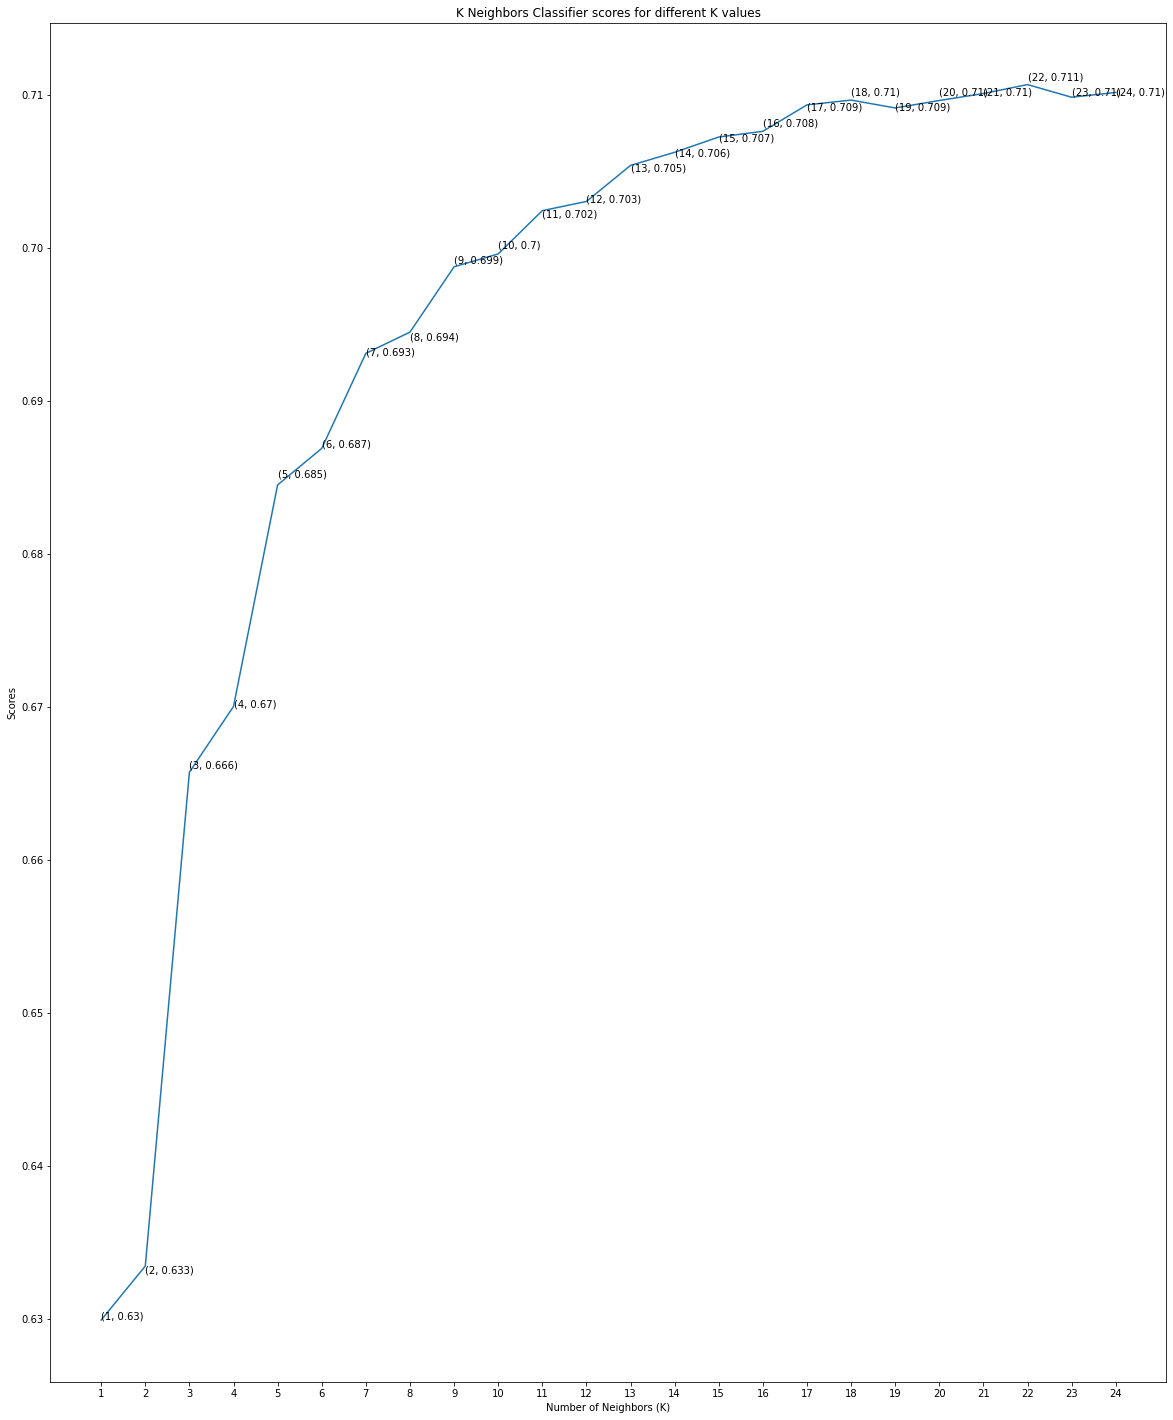

In [68]:
plt.figure(figsize=(20,25))
plt.plot([k for k in range(1,25)],knn_scores)
for i in range(1,25):
    plt.text(i,knn_scores[i-1].round(3),(i,knn_scores[i-1].round(3)))
    plt.xticks([i for i in range(1, 25)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('Classifier scores ')

In [64]:
knn_scores

[0.6308142857142857,
 0.6331999999999999,
 0.6659428571428572,
 0.6701285714285714,
 0.6832857142857143,
 0.687,
 0.6935428571428571,
 0.6950428571428571,
 0.6987285714285714,
 0.7009714285714286,
 0.7021,
 0.7030857142857142,
 0.7064571428571428,
 0.7074,
 0.707457142857143,
 0.7080571428571428,
 0.7095142857142858,
 0.7100857142857142,
 0.7100428571428572]

In [92]:
from sklearn.tree import DecisionTreeClassifier
#Decision tree
dt = DecisionTreeClassifier(random_state=0)
dt_scores = cross_val_score(dt, X, Y, cv=5)
print(dt_scores.mean())

0.6342


In [103]:
dec_scores =[]
for x in range(1,15):
    dec = DecisionTreeClassifier(max_depth=x)
    score = cross_val_score(dec, X, Y, cv=5)
    dec_scores.append(score.mean())
dec_scores

[0.7139000000000001,
 0.7139000000000001,
 0.7257857142857143,
 0.7294142857142857,
 0.7301285714285715,
 0.7312428571428572,
 0.7297571428571428,
 0.7286142857142857,
 0.7291285714285713,
 0.7281571428571428,
 0.7250571428571428,
 0.7223428571428572,
 0.7191285714285713,
 0.7141714285714286]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

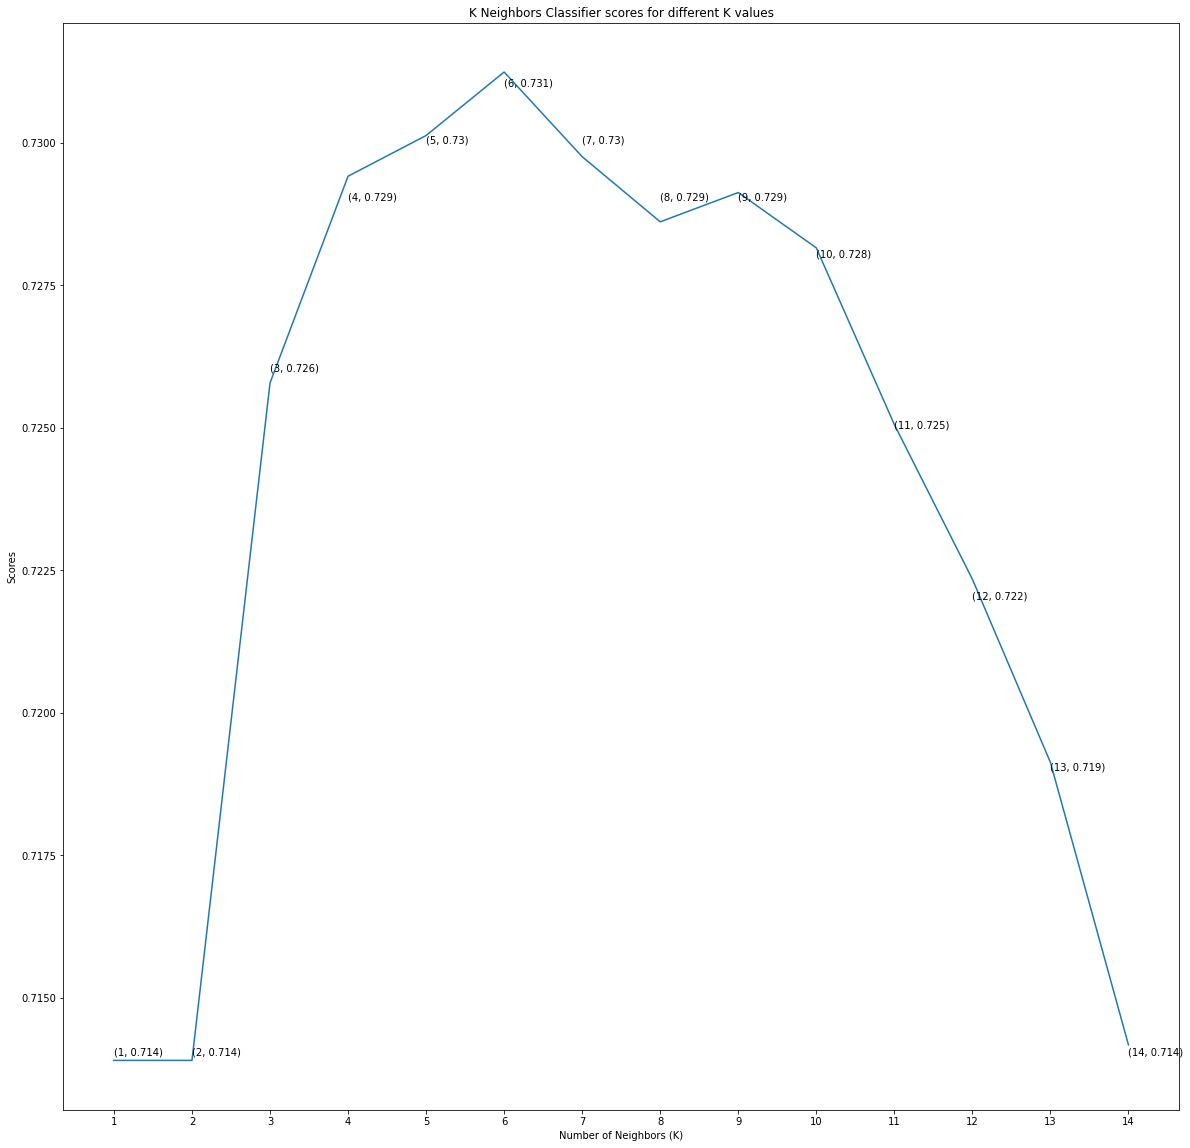

In [105]:
plt.figure(figsize=(20,20))
plt.plot([x for x in range(1,15)],dec_scores)
for i in range(1,15):
    plt.text(i,dec_scores[i-1].round(3),(i,dec_scores[i-1].round(3)))
    plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('Classifier scores')